<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Transformers Architecture

##Overview of the Transformer Architecture* What is a Transformer?
* Neural network architecture introduced in the paper "**Attention is All You Need**"
* It relies entirely on the **attention mechanism** to process sequential data without using recurrence or convolution
* **Transformative** for NLP tasks like translation, summarization, and text generation


##Overview of the Transformer Architecture
**Components of the Transformer**

* **Encoder**
* Processes the input sequence and generates a contextualized representation
* Consists of multiple identical layers, each with
* **Self-Attention Mechanism:** Captures dependencies between all input tokens
* **Feed-Forward Neural Network (FFNN):** Processes the attention outputs

* **Decoder**
* Generates the output sequence one token at a time
* Consists of multiple identical layers, each with
* **Masked Self-Attention Mechanism:** Prevents the decoder from attending to future tokens
* **Encoder-Decoder Attention:** Attends to encoder outputs
* **Feed-Forward Neural Network**

**Workflow:** Input sequence --> to Encoder --> to Context vectors --> to Decoder --> to Output sequence


##Detailed Breakdown of the Transformer Model Layers
**Self-Attention Layer**
* Captures relationships between all tokens in the input sequence
* Computes the importance of each token to all other tokens


* **Positional Encoding**
* Since Transformers lack recurrence, positional encoding injects information about the token order into the model


* **Feed-Forward Neural Network**
* Applies a position-wise FFNN to the outputs of the attention layer
* Non-linear transformation enhances the representation


* **Layer Normalization**
* Stabilizes training by normalizing inputs within each layer


* **Multi-Head Attention**
* Combines multiple self-attention mechanisms to learn various aspects of relationships within the sequence


##Key Differences Between Transformers and RNNs
| Aspect | Transformers | RNNs |
| --- | --- | --- |
| **Parallelization** | Fully parallelizable; faster training | Sequential processing limits parallelization |
| **Long-Term Dependencies** | Handles long dependencies via attention | Struggles with long dependencies |
| **Position Information** | Uses positional encodings | Implicitly encodes position |
| **Architecture** | Built on attention mechanisms; no recurrence | Sequential processing through hidden states |


**Objective**
- Visualize the architecture of a Transformer model and set up an environment for working with Transformers using **PyTorch** and/or **TensorFlow**


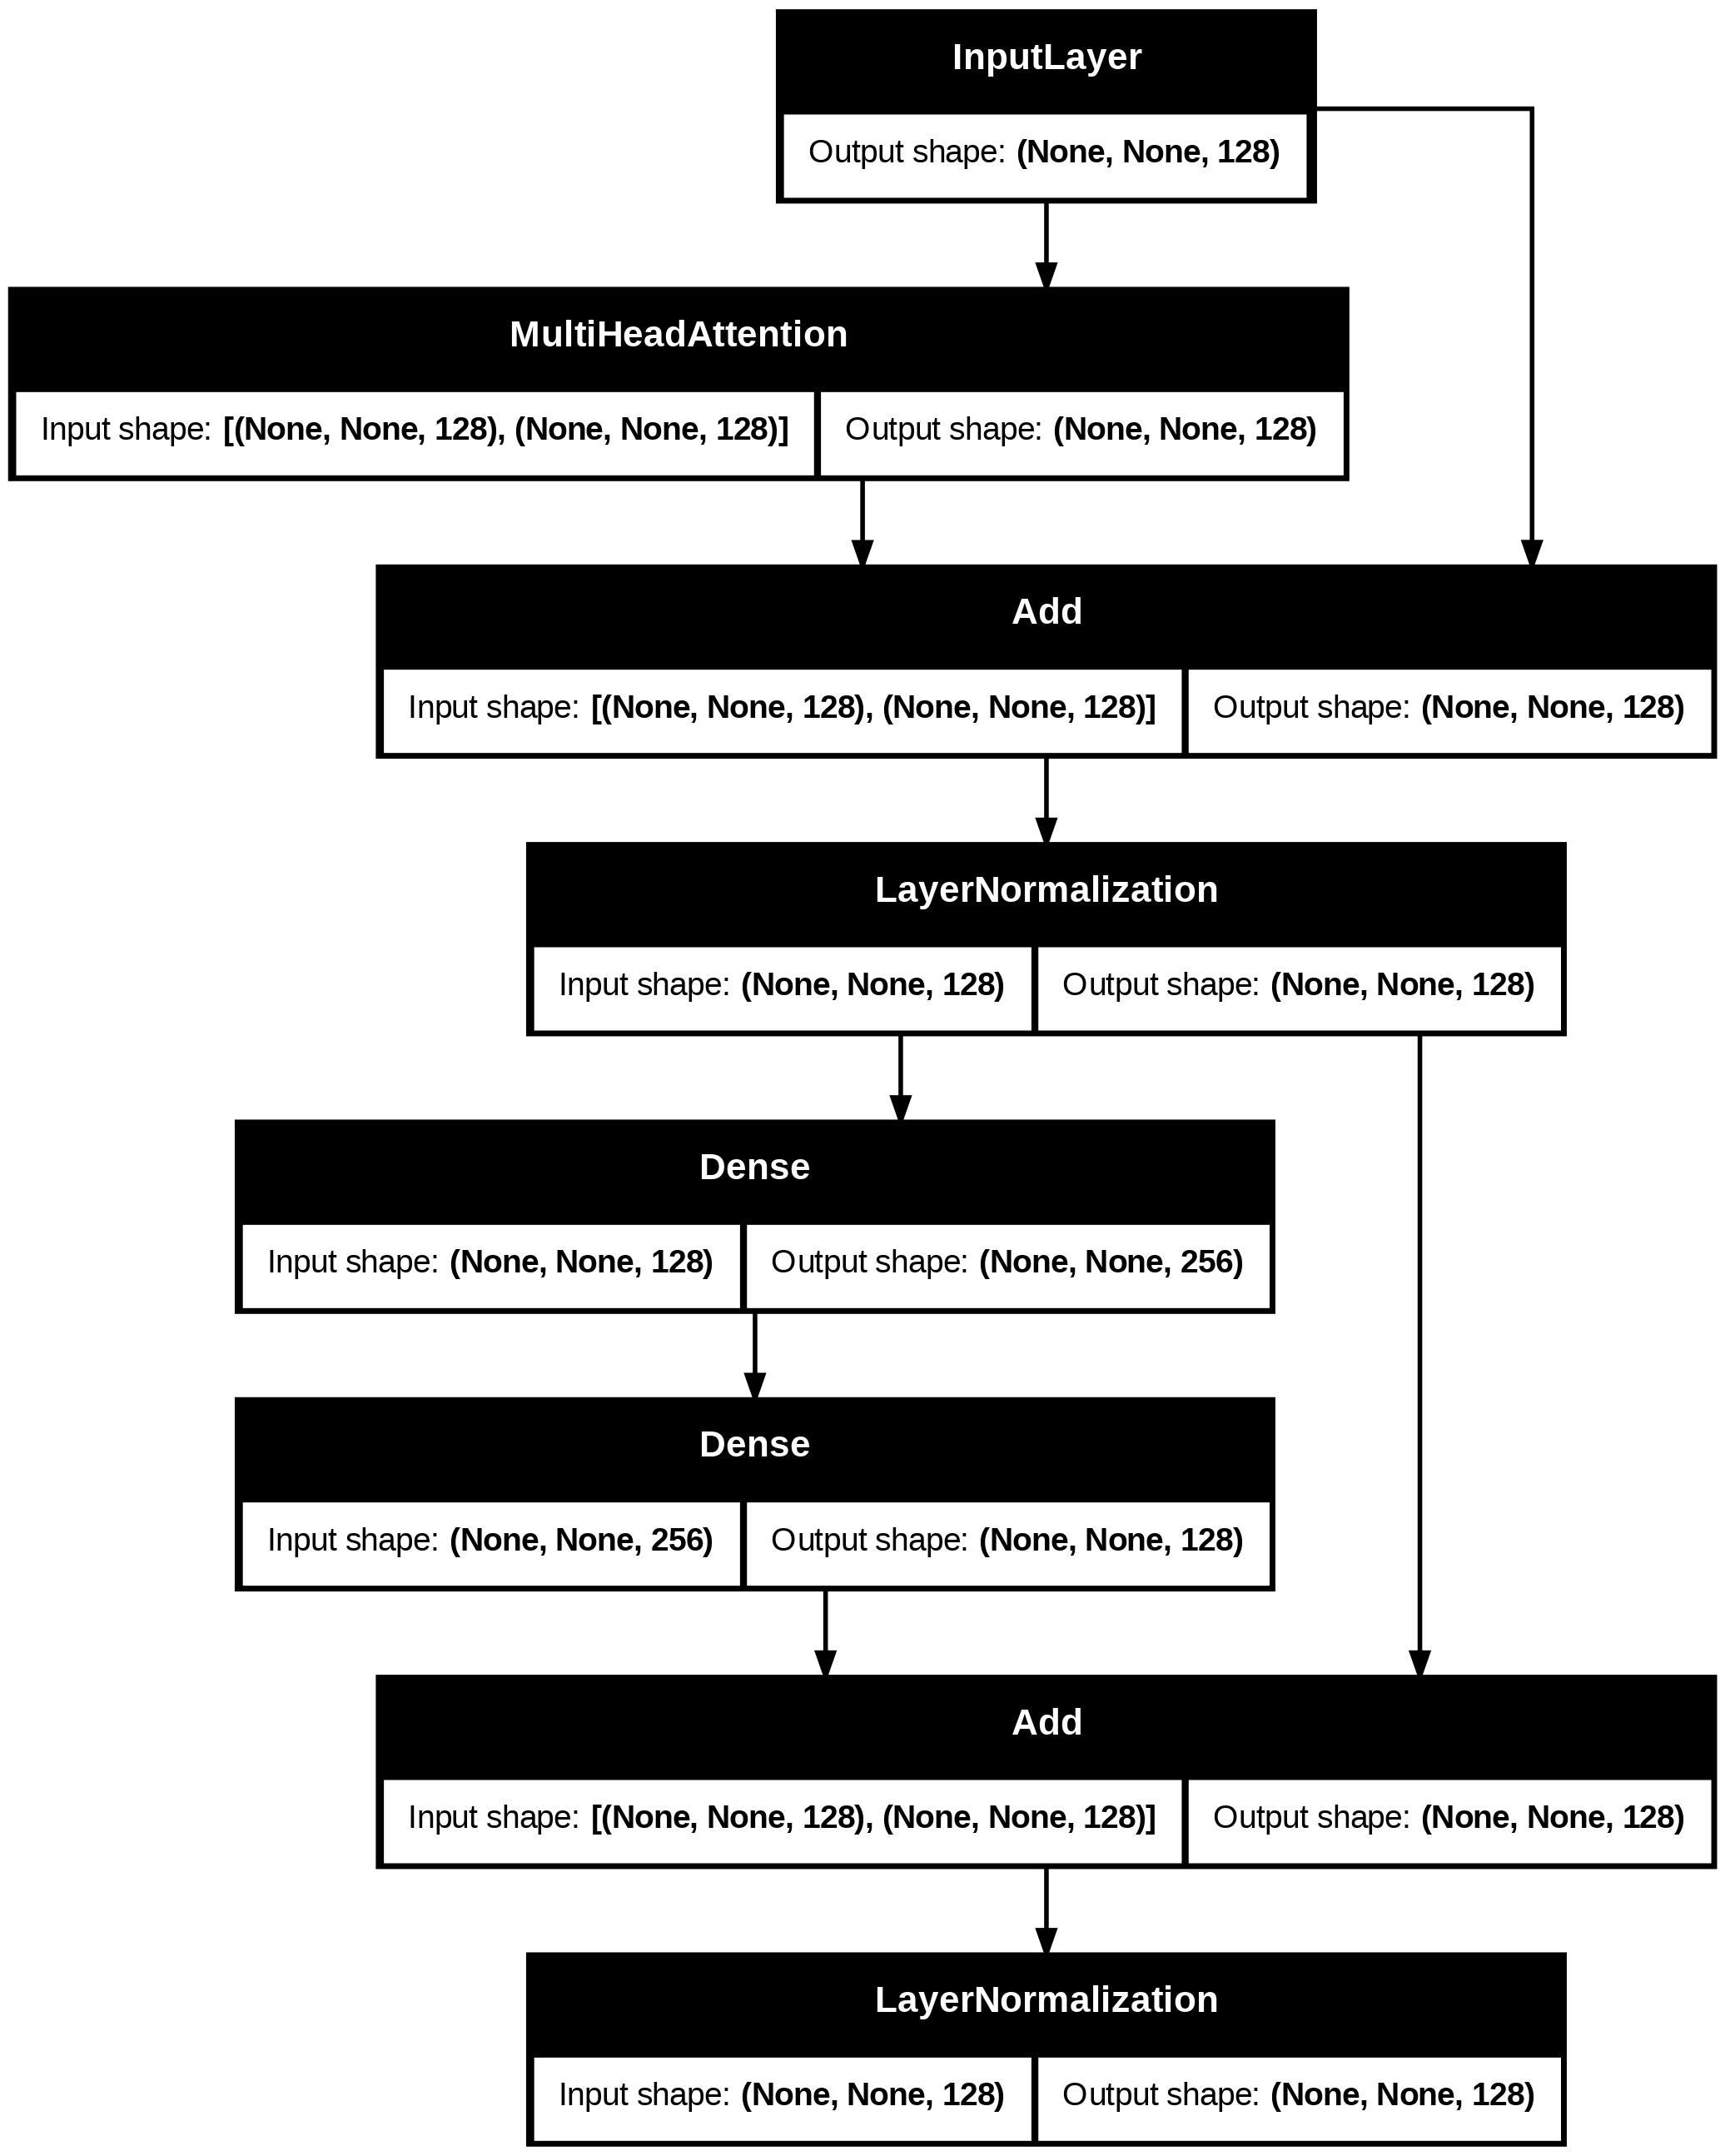

In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Add, MultiHeadAttention

# Define a simplified Transformer ENCODER Block
def transformer_encoder(input_dim, num_heads, ff_dim):
    inputs = Input(shape=(None, input_dim))

    # Multi-Head Self Attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=input_dim)(inputs, inputs)
    attention_output = Add()([inputs, attention_output])
    attention_output = LayerNormalization()(attention_output)

    # Feed-Forward Neural Network
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(input_dim)(ff_output)
    outputs = Add()([attention_output, ff_output])
    outputs = LayerNormalization()(outputs)
    return Model(inputs, outputs)

# Create and Visualize a sample transformer Encoder block
encoder_block = transformer_encoder(input_dim=128, num_heads=8, ff_dim=256)
plot_model(encoder_block, show_shapes=True, to_file="transformer_encoder.png")

In [3]:
from transformers import BertTokenizer, BertModel

# Load a pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Tokenize a sample input, returning PyTorch tensors
text = "Transformers are powerful models for NLP tasks"
inputs = tokenizer(text, return_tensors='pt') # Changed from 'tf' to 'pt'

# Pass the input through the model
outputs = model(**inputs)
print("Hidden States Shape:", outputs.last_hidden_state.shape)

Hidden States Shape: torch.Size([1, 10, 768])
